# TUGAS #1: IMPOR LIBRARY DAN DATASET

In [ ]:
#manipulasi data
import pandas as pd
# manipulasi array
import numpy as np
# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Agar Autogluon berfungsi di Google Colab, Anda perlu menginstal ipykernel dan memulai ulang notebook
# Kernel IPython adalah backend eksekusi Python untuk Jupyter
%pip install -U ipykernel

In [ ]:
%pip install -U pip
%pip install -U setuptools wheel
%pip install -U "mxnet<2.0.0"
%pip install autogluon --no-cache-dir

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 271.7 MB/s eta 0

In [ ]:
# AutoGluon dimodulasi menjadi sub-modul untuk: 1. Tabular, 2. teks, 3.Gambar
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
insurance_df = pd.read_csv('insurance.csv')

In [ ]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**PELUANG PRAKTEK #1 [OPSIONAL]:**
- **Berapa banyak wilayah unik yang kita miliki di DataFrame insurance_df?**

In [ ]:
insurance_df['region'].unique()

# ada 4 wilayah unik pada atribut 'region'

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
insurance_df['region'].value_counts()

# ada 4 wilayah unik pada atribut 'region'

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


# TUGAS #2: LAKUKAN EXPLORATORY DATA ANALYSIS

In [ ]:
# Tampilkan lima baris pertama di DataFrame
insurance_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
# Tampilkan lima baris terakhir di DataFrame
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
len(insurance_df)

1338

In [ ]:
# Print ringkasan statistik
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Dapatkan informasi tambahan dari dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Pengelompokan berdasarkan wilayah untuk melihat hubungan antara region dan charges
# Sepertinya region south-east memiliki charges dan body mass index tertinggi
# Select only numeric columns before calculating the mean
numeric_columns = insurance_df.select_dtypes(include=np.number).columns
df_region = insurance_df.groupby(by='region')[numeric_columns].mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


**PELUANG PRAKTEK #2 [OPSIONAL]:**
- **Kelompokkan data berdasarkan 'age' dan periksa hubungan antara 'age' dan 'charges'**

In [ ]:
df_age = insurance_df.groupby(by='age')[numeric_columns].mean()
df_age

,age,bmi,children,charges
age,,,,
18,18.0,31.326159,0.449275,7086.217556
19,19.0,28.596912,0.426471,9747.909335
20,20.0,30.632759,0.862069,10159.697736
21,21.0,28.185714,0.785714,4730.464330
22,22.0,31.087679,0.714286,10012.932802
23,23.0,31.454464,1.000000,12419.820040
24,24.0,29.142679,0.464286,10648.015962
25,25.0,29.693929,1.285714,9838.365311
26,26.0,29.428929,1.071429,6133.825309


# TUGAS #3: Lakukan Visualisasi Data

<Axes: >

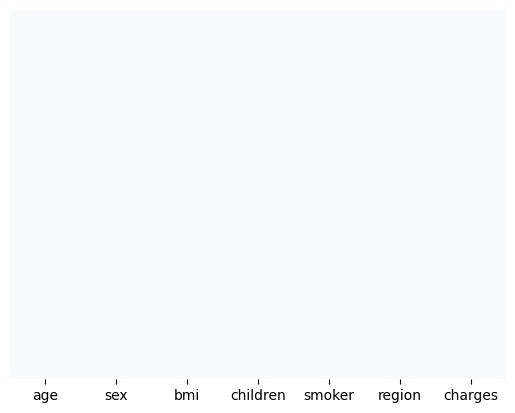

In [ ]:
# periksa apakah ada nilai Null
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# periksa apakah ada nilai Null
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


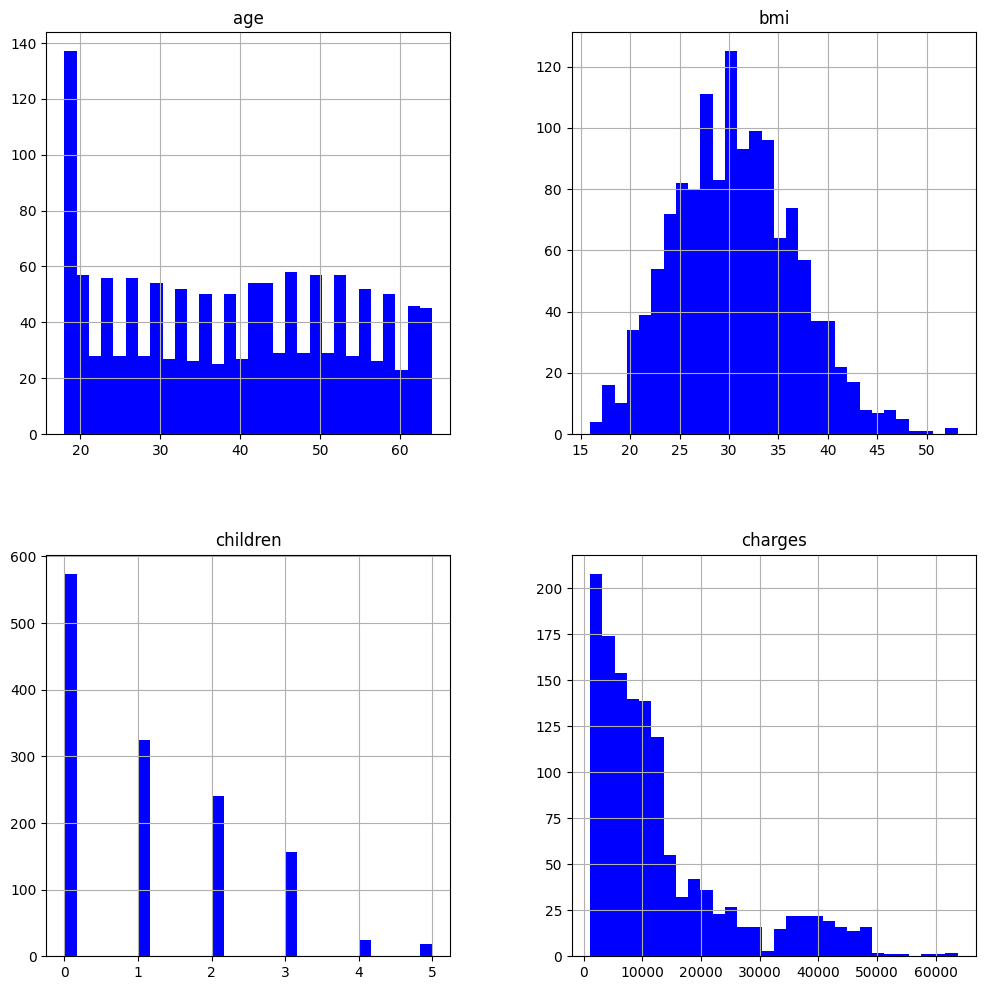

In [ ]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'b');

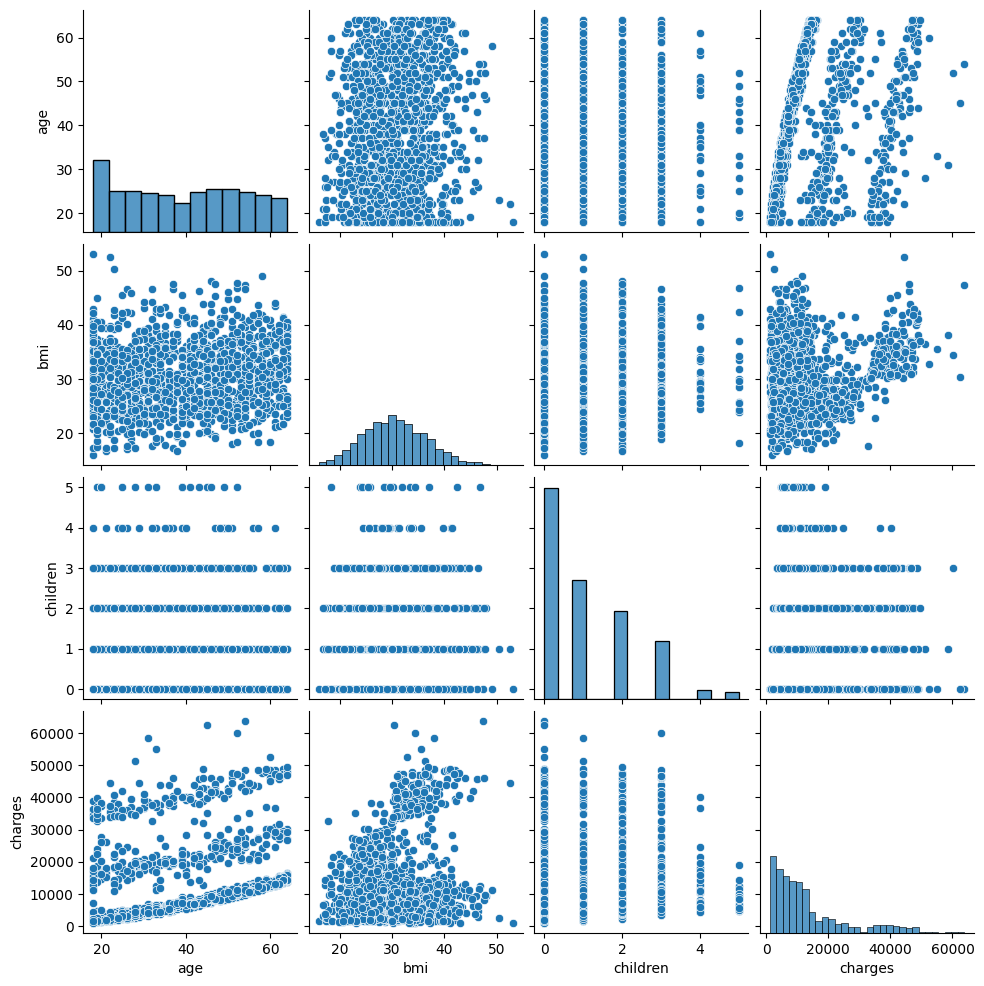

In [ ]:
# plot pairplot
sns.pairplot(insurance_df)

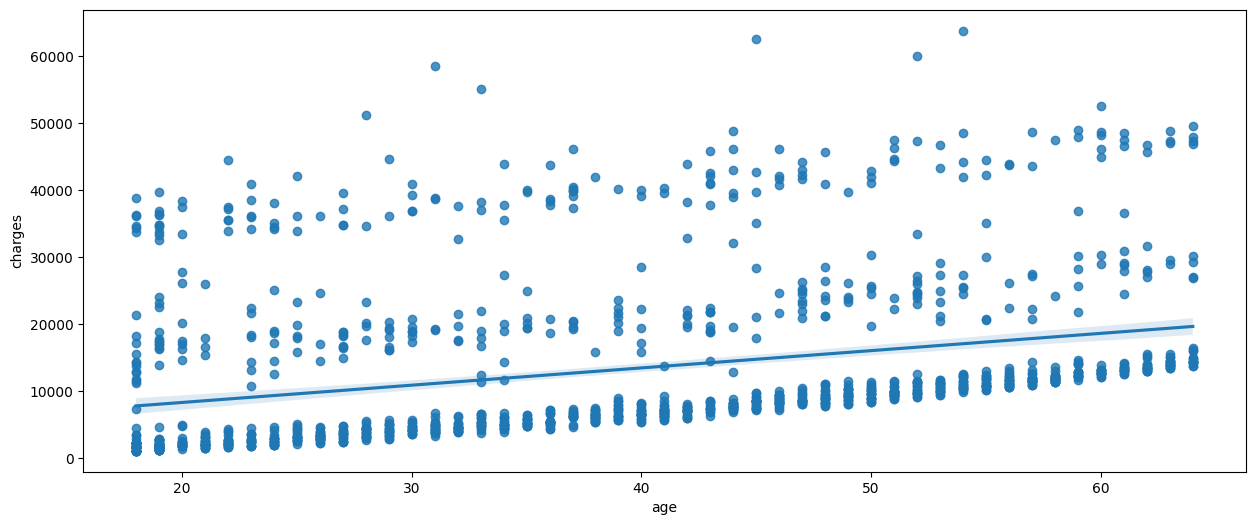

In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()


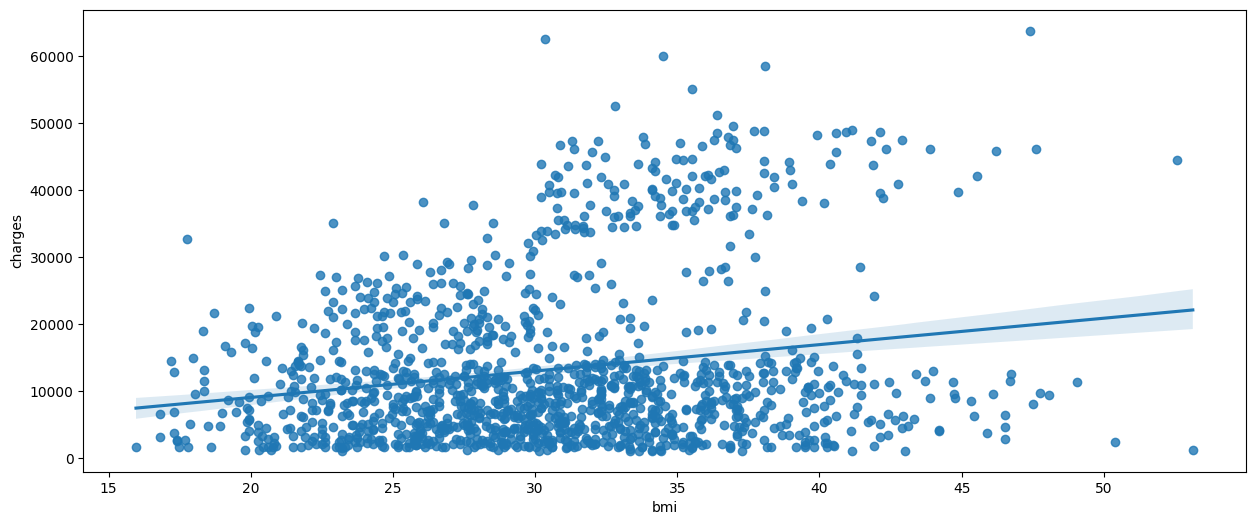

In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


**PELUANG PRAKTEK #3 [OPSIONAL]:**
 - **Hitung dan plot matriks korelasi**
 - **Fitur mana yang memiliki korelasi paling positif dengan 'charges'?**

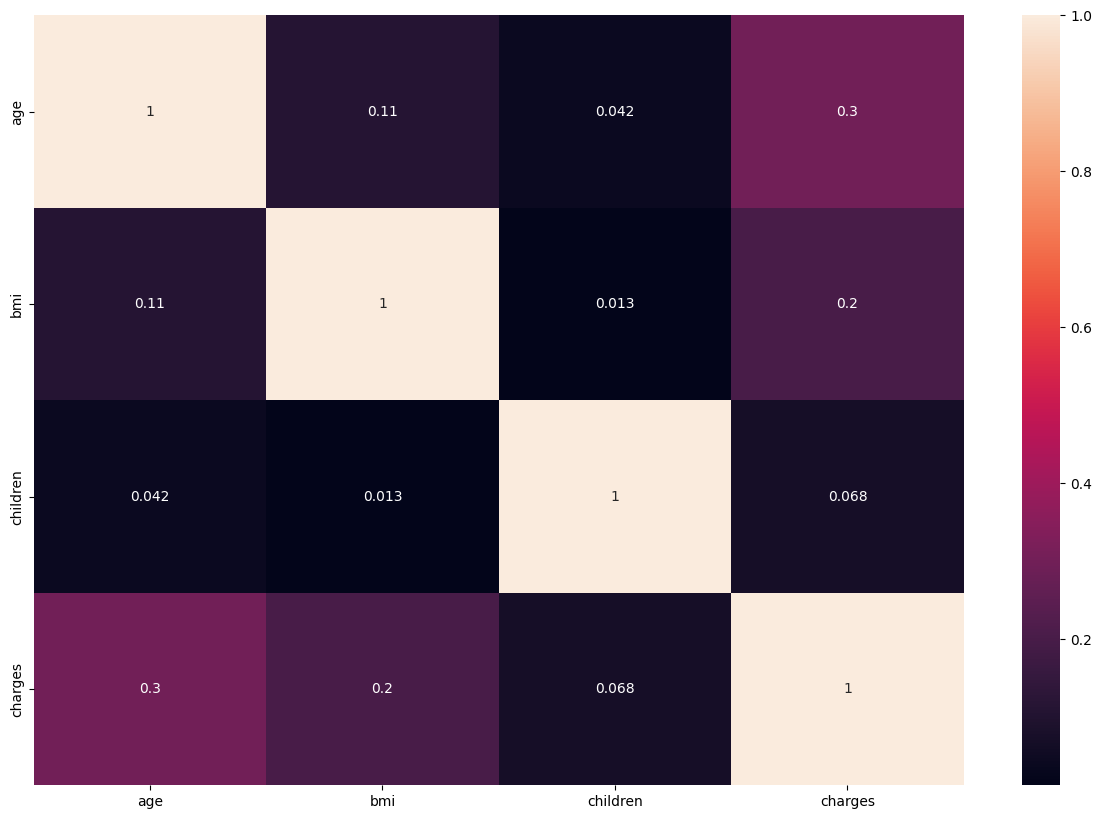

In [ ]:
plt.figure(figsize = (15, 10))
# Select only numeric columns for correlation calculation
numeric_df = insurance_df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot = True);

# TUGAS #4: MELATIH BEBERAPA MODEL MENGGUNAKAN AUTOGLUON

In [ ]:
# Pisahkan data menjadi 80% untuk pelatihan dan 20% untuk pengujian menggunakan train_test_split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(insurance_df, test_size=0.2, random_state=0)
# tanpa memisahkan x dan y, jadi langsung aja pakai nama datasetnya

In [ ]:
df_train

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.100,4,yes,southwest,40182.24600
194,18,male,34.430,0,no,southeast,1137.46970
240,23,female,36.670,2,yes,northeast,38511.62830
1168,32,male,35.200,2,no,southwest,4670.64000
1192,58,female,32.395,1,no,northeast,13019.16105
...,...,...,...,...,...,...,...
763,27,male,26.030,0,no,northeast,3070.80870
835,42,male,35.970,2,no,southeast,7160.33030
1216,40,male,25.080,0,no,southeast,5415.66120
559,19,male,35.530,0,no,northwest,1646.42970


In [ ]:
df_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [ ]:
# Latih beberapa model regresi ML menggunakan AutoGluon
# Anda perlu menentukan kolom target, train_data, limit_time, dan preset
# Perhatikan bahwa AutoGluon secara otomatis mendeteksi jika masalahnya adalah masalah klasifikasi atau jenis regresi dari kolom 'label'
# Untuk masalah tipe regresi, nilai 'label' umumnya adalah floating point bukan bilangan bulat dengan jumlah nilai unik yang sangat besar

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = df_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250201_035547"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.00 GB / 12.67 GB (86.8%)
Disk Space Avail:   75.28 GB / 107.72 GB (69.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.844793          r2       0.364256  53.487854                0.001266           0.140697            2       True          7
1     WeightedEnsemble_L3   0.843629          r2       0.701932  82.720943                0.001461           0.098655            3       True         10
2       LightGBMXT_BAG_L1   0.840820          r2       0.049960  25.128123                0.049960          25.128123            1       True          3
3       LightGBMXT_BAG_L2   0.840509          r2       0.700472  82.622288                0.077803          27.916979            2       True          8
4         LightGBM_BAG_L1   0.839615          r2       0.052875  26.303847                0.052875          26.303847            1       True          4
5         LightGBM_B

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.07448567993942246,
  'KNeighborsDist_BAG_L1': -0.16102308298670942,
  'LightGBMXT_BAG_L1': 0.8408198040276409,
  'LightGBM_BAG_L1': 0.8396145120831351,
  'RandomForestMSE_BAG_L1': 0.8227276280725969,
  'ExtraTreesMSE_BAG_L1': 0.8218176959677763,
  'WeightedEnsemble_L2': 0.8447928406247395,
  'LightGBMXT_BAG_L2': 0.8405093422840162,
  'LightGBM_BAG_L2': 0.8352036590888718,
  'WeightedEnsemble_L3': 0.8436290251471

# TUGAS #5: MENGEVALUASI KINERJA MODEL TERLATIH

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.844793,r2,0.364256,53.487854,0.001266,0.140697,2,True,7
1,WeightedEnsemble_L3,0.843629,r2,0.701932,82.720943,0.001461,0.098655,3,True,10
2,LightGBMXT_BAG_L1,0.840820,r2,0.049960,25.128123,0.049960,25.128123,1,True,3
3,LightGBMXT_BAG_L2,0.840509,r2,0.700472,82.622288,0.077803,27.916979,2,True,8
4,LightGBM_BAG_L1,0.839615,r2,0.052875,26.303847,0.052875,26.303847,1,True,4
5,LightGBM_BAG_L2,0.835204,r2,0.673267,83.488831,0.050598,28.783522,2,True,9
6,RandomForestMSE_BAG_L1,0.822728,r2,0.260156,1.915186,0.260156,1.915186,1,True,5
7,ExtraTreesMSE_BAG_L1,0.821818,r2,0.230393,1.347826,0.230393,1.347826,1,True,6
8,KNeighborsUnif_BAG_L1,-0.074486,r2,0.015488,0.006368,0.015488,0.006368,1,True,1
9,KNeighborsDist_BAG_L1,-0.161023,r2,0.013797,0.003959,0.013797,0.003959,1,True,2


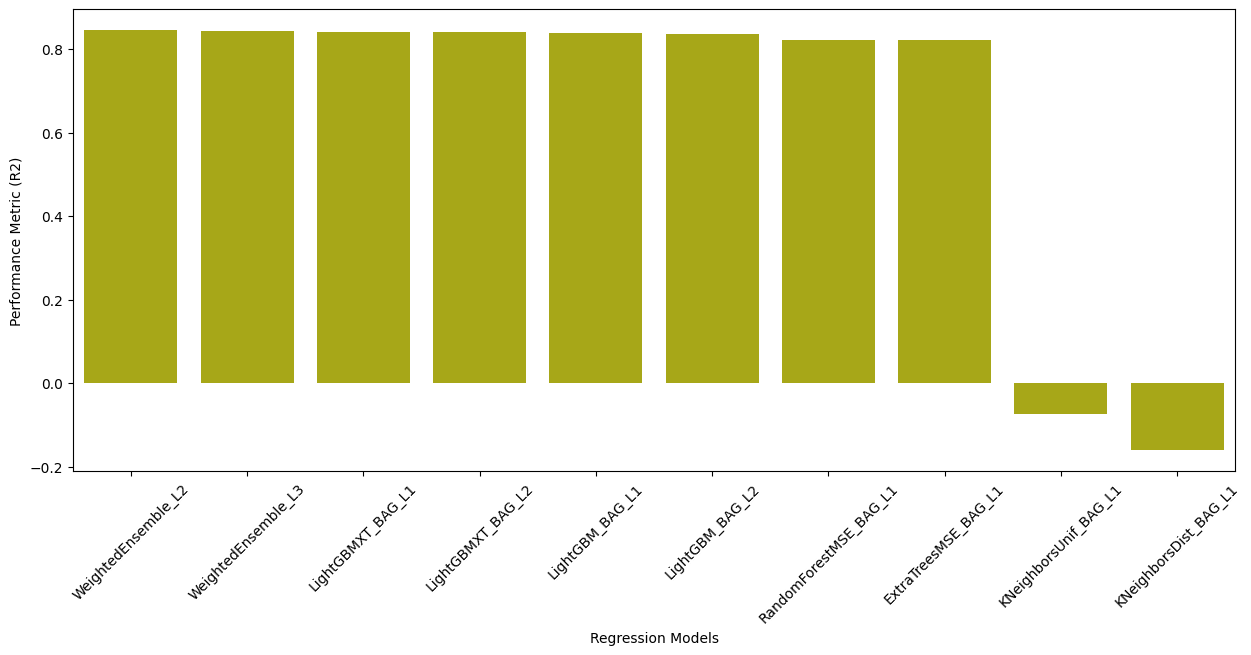

In [ ]:
# Inisialisasi figur matplotlib
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "y")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [ ]:
predictor.evaluate(df_test)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


{'r2': 0.9006444592914667,
 'root_mean_squared_error': -3976.234833286801,
 'mean_squared_error': -15810443.449443314,
 'mean_absolute_error': -2472.2184061949624,
 'pearsonr': 0.9500166682791553,
 'median_absolute_error': -1656.2304554687498}

In [ ]:
# menilai kinerja model
# Pilih 5 set data uji dan hasilkan prediksi
y_pred = predictor.predict(df_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [10883.5146484375, 9972.25390625, 45175.515625, 13630.44921875, 10548.8837890625]


In [ ]:
df_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [ ]:
y_test = df_test['charges']
y_test #groundtruth

,charges
578,9724.53000
610,8547.69130
569,45702.02235
1034,12950.07120
198,9644.25250
...,...
1084,15019.76005
726,6664.68595
1132,20709.02034
725,40932.42950


Text(0.5, 0, 'True Values')

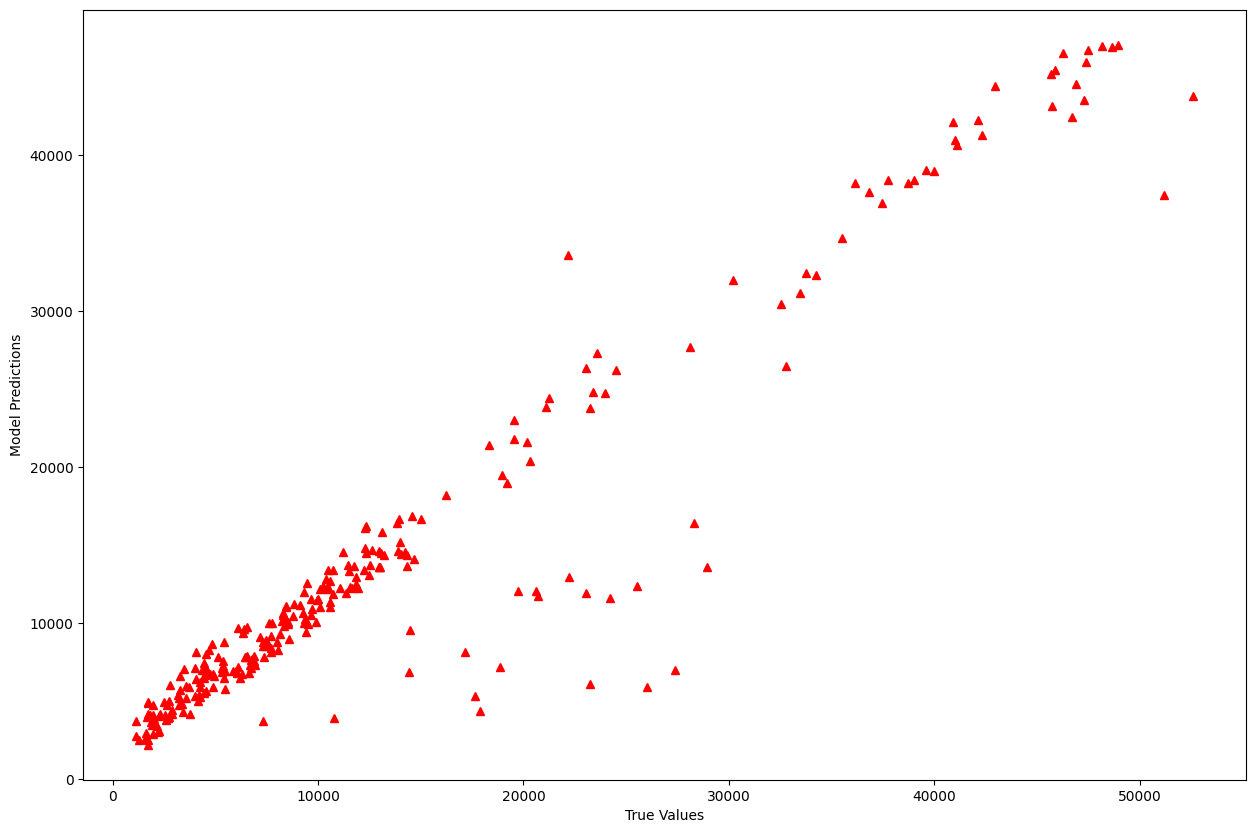

In [ ]:
y_predict = predictor.predict(df_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 3976.235 
MSE = 15810443.449443314 
MAE = 2472.2184061949624 
R2 = 0.9006444592914667


**PELUANG PRAKTEK #4 [OPSIONAL]:**
- **Retrain model regressor menggunakan AutoGluon dengan nilai preset yang berbeda**
- **Setel limit_time ke 300 detik**
- **Gunakan RMSE sebagai metrik kunci dan plot barchart**
- **Model mana yang memberikan kinerja terbaik?**
- **Beri penilaian pada kinerja model terlatih dengan membandingkan berbagai metrik**

No path specified. Models will be saved in: "AutogluonModels/ag-20250201_042211"
Preset alias specified: 'high_quality_fast_inference_only_refit' maps to 'high_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.22 GB / 12.67 GB (80.6%)
Disk Space Avail:   75.07 GB / 107.72 GB (69.7%)
Presets specified: ['high_quality_fast_inference_only_refit']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if mem

*** Summary of fit() ***
Estimated performance of each model:
                          model     score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L2  -4654.184657  root_mean_squared_error       0.734269  109.644159                0.000693           0.038445            2      False          9
1           WeightedEnsemble_L3  -4656.551615  root_mean_squared_error       0.690515   84.187994                0.001029           0.051670            3      False         11
2               CatBoost_BAG_L1  -4688.508431  root_mean_squared_error       0.032887   26.290421                0.032887          26.290421            1      False          6
3             LightGBMXT_BAG_L2  -4762.818332  root_mean_squared_error       1.237440  166.006294                0.060203          29.069727            2      False         10
4             LightGBMXT_BAG_L1  -4777.138466  root_mean_s

{'root_mean_squared_error': -3926.9939619081592,
 'mean_squared_error': -15421281.57686314,
 'mean_absolute_error': -2399.151076459363,
 'r2': 0.9030900193035555,
 'pearsonr': 0.9509146153230783,
 'median_absolute_error': -1581.5330757812503}

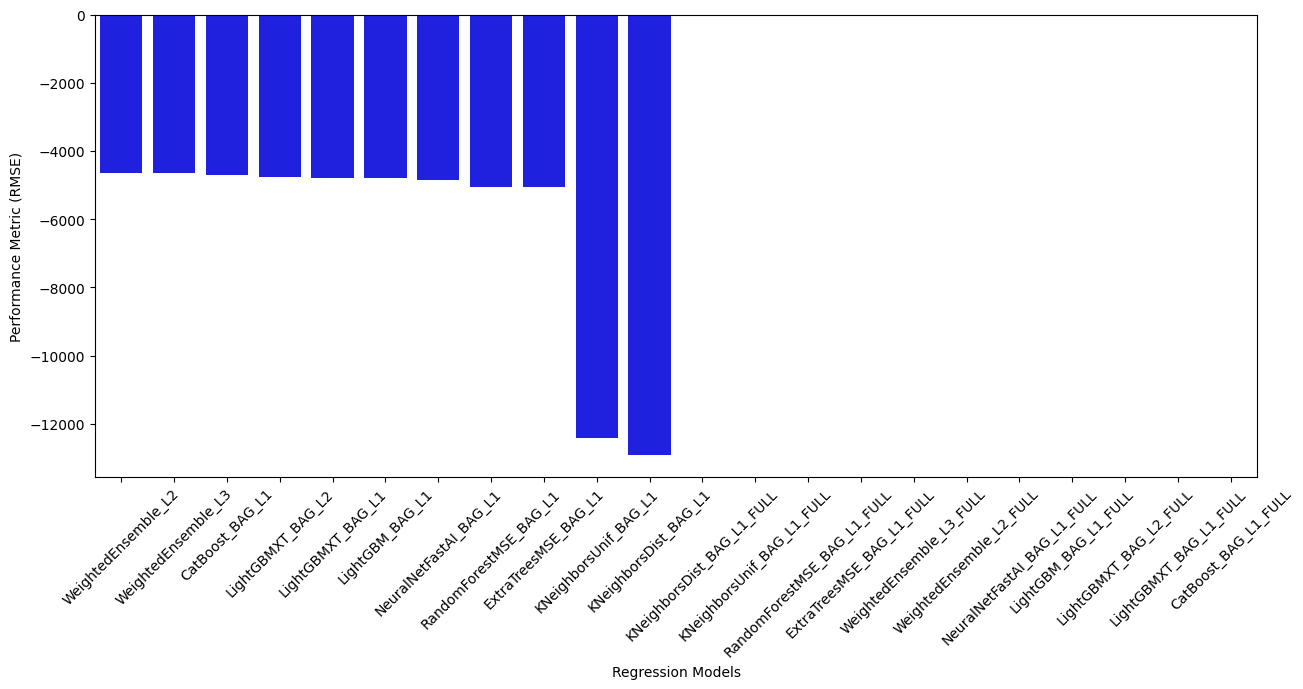

In [ ]:
# Latih beberapa model regresi ML menggunakan AutoGluon
# Anda perlu menentukan kolom target, train_data, limit_time, dan preset
# Perhatikan bahwa AutoGluon secara otomatis mendeteksi jika masalahnya adalah masalah klasifikasi atau jenis regresi dari kolom 'label'
# Untuk masalah tipe regresi, nilai 'label' umumnya adalah floating point bukan bilangan bulat dengan jumlah nilai unik yang sangat besar

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = df_train, time_limit = 300, presets = "high_quality_fast_inference_only_refit")
predictor.fit_summary()
predictor.leaderboard()

# Inisialisasi figur matplotlib
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(df_test)

# SOLUSI PELUANG PRAKTEK

**SOLUSI PELUANG PRAKTEK #1:**
- **Berapa banyak wilayah unik yang kita miliki di DataFrame insurance_df?**

In [ ]:
insurance_df['region'].unique()

**SOLUSI PELUANG PRAKTEK #2:**
- **Kelompokkan data berdasarkan 'age' dan periksa hubungan antara 'age' dan 'charges'**

In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

**SOLUSI PELUANG PRAKTEK #3:**
 - **Hitung dan plot matriks korelasi**
 - **Fitur mana yang memiliki korelasi paling positif dengan 'charges'?**

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True);
# smoker and age have positive correlations with charges

**SOLUSI PELUANG PRAKTEK #4:**
- **Retrain model regressor menggunakan AutoGluon dengan nilai preset yang berbeda**
- **Setel limit_time ke 300 detik**
- **Gunakan RMSE sebagai metrik kunci dan plot barchart**
- **Model mana yang memberikan kinerja terbaik?**
- **Beri penilaian pada kinerja model terlatih dengan membandingkan berbagai metrik**

In [ ]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = df_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(df_test)

# FINAL CAPSTONE PROJECT

- Tujuan dari proyek ini adalah untuk membangun, melatih, dan menguji model pengklasifikasi untuk memprediksi diabetes pada pasien yang menggunakan AutoGluon. Proyek ini dapat digunakan secara efektif oleh profesional kesehatan untuk mendeteksi diabetes dan memahami faktor kunci yang berkontribusi terhadap penyakit tersebut.
- Harap selesaikan tugas2 dibawah ini:
  - Muat data “diabetes.csv”
  - Lakukan Exploratory Data Analysis
  - Gunakan preset ‘best_quality’ dan metrik ‘accuracy’, latih model klasifikasi menggunakan AutoGluon untuk memprediksi kolom "Outcome".
  - Evaluasi kinerja model terlatih dengan memplot leaderboard dan menunjukkan model terbaik. Buat confusion matrix.



## Muat data “diabetes.csv”

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')

## Lakukan Exploratory Data Analysis

In [ ]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# melihat data missing value
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

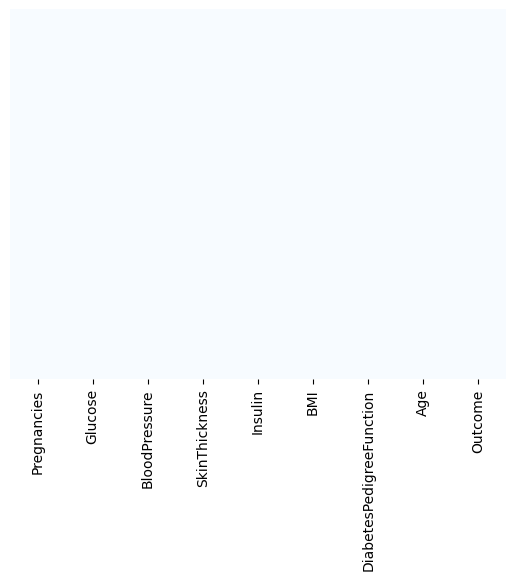

In [ ]:
# melihat missing value menggunakan visualisasi
sns.heatmap(diabetes_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
diabetes_df['Outcome'].value_counts(True)
# data imbalnanced

,proportion
Outcome,
0,0.651042
1,0.348958


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

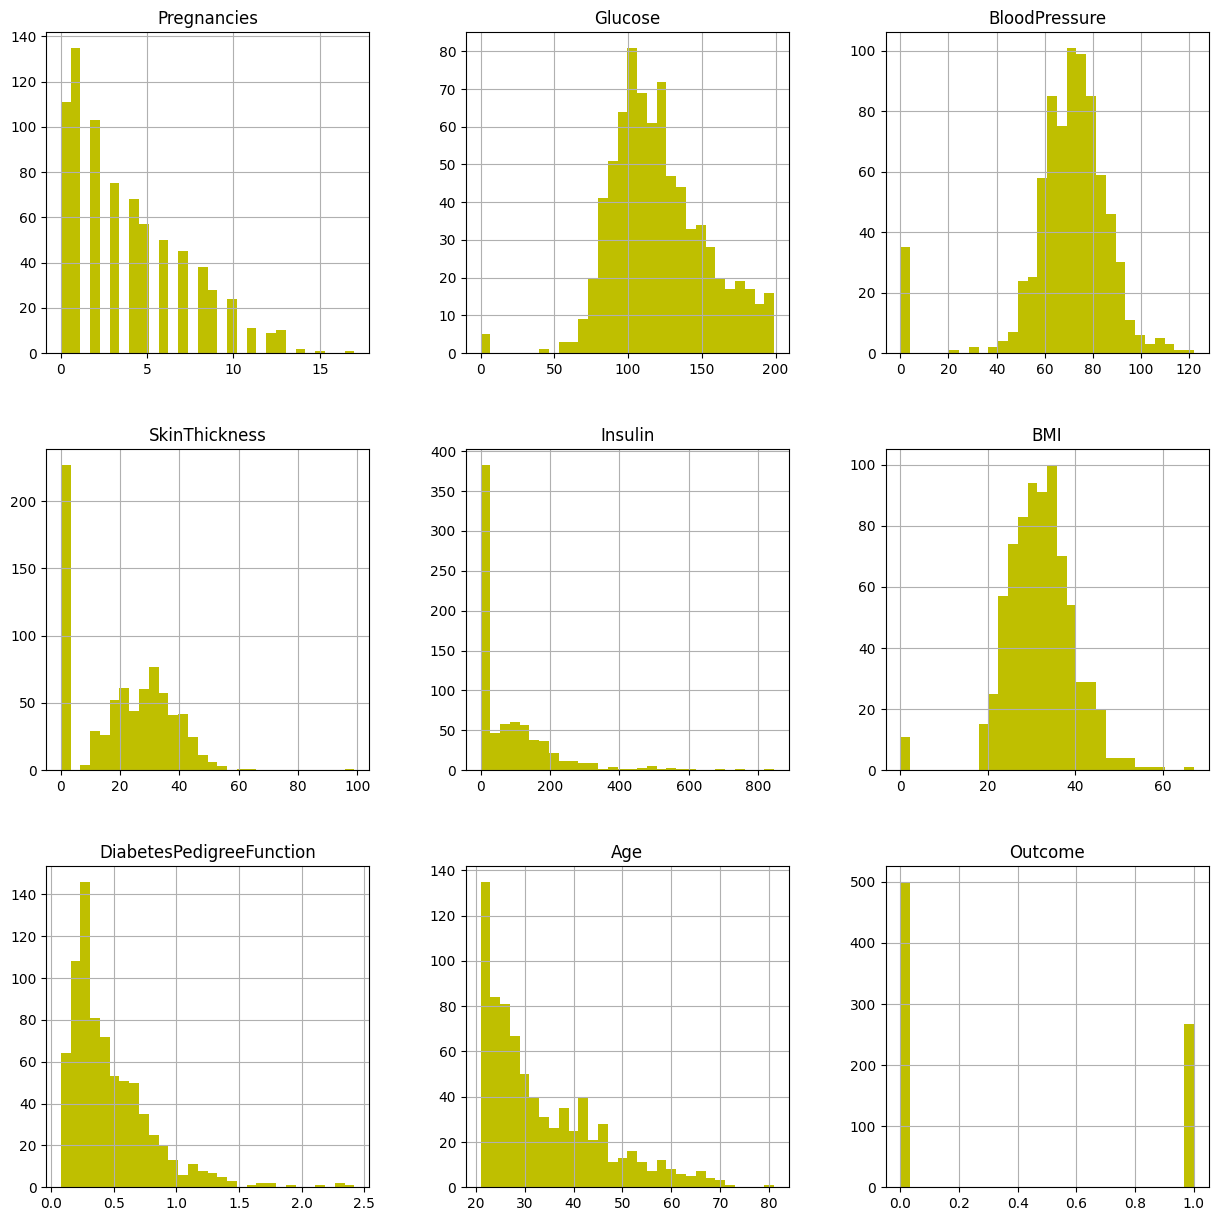

In [ ]:
diabetes_df.hist(bins = 30, figsize = (15,15), color = 'y')

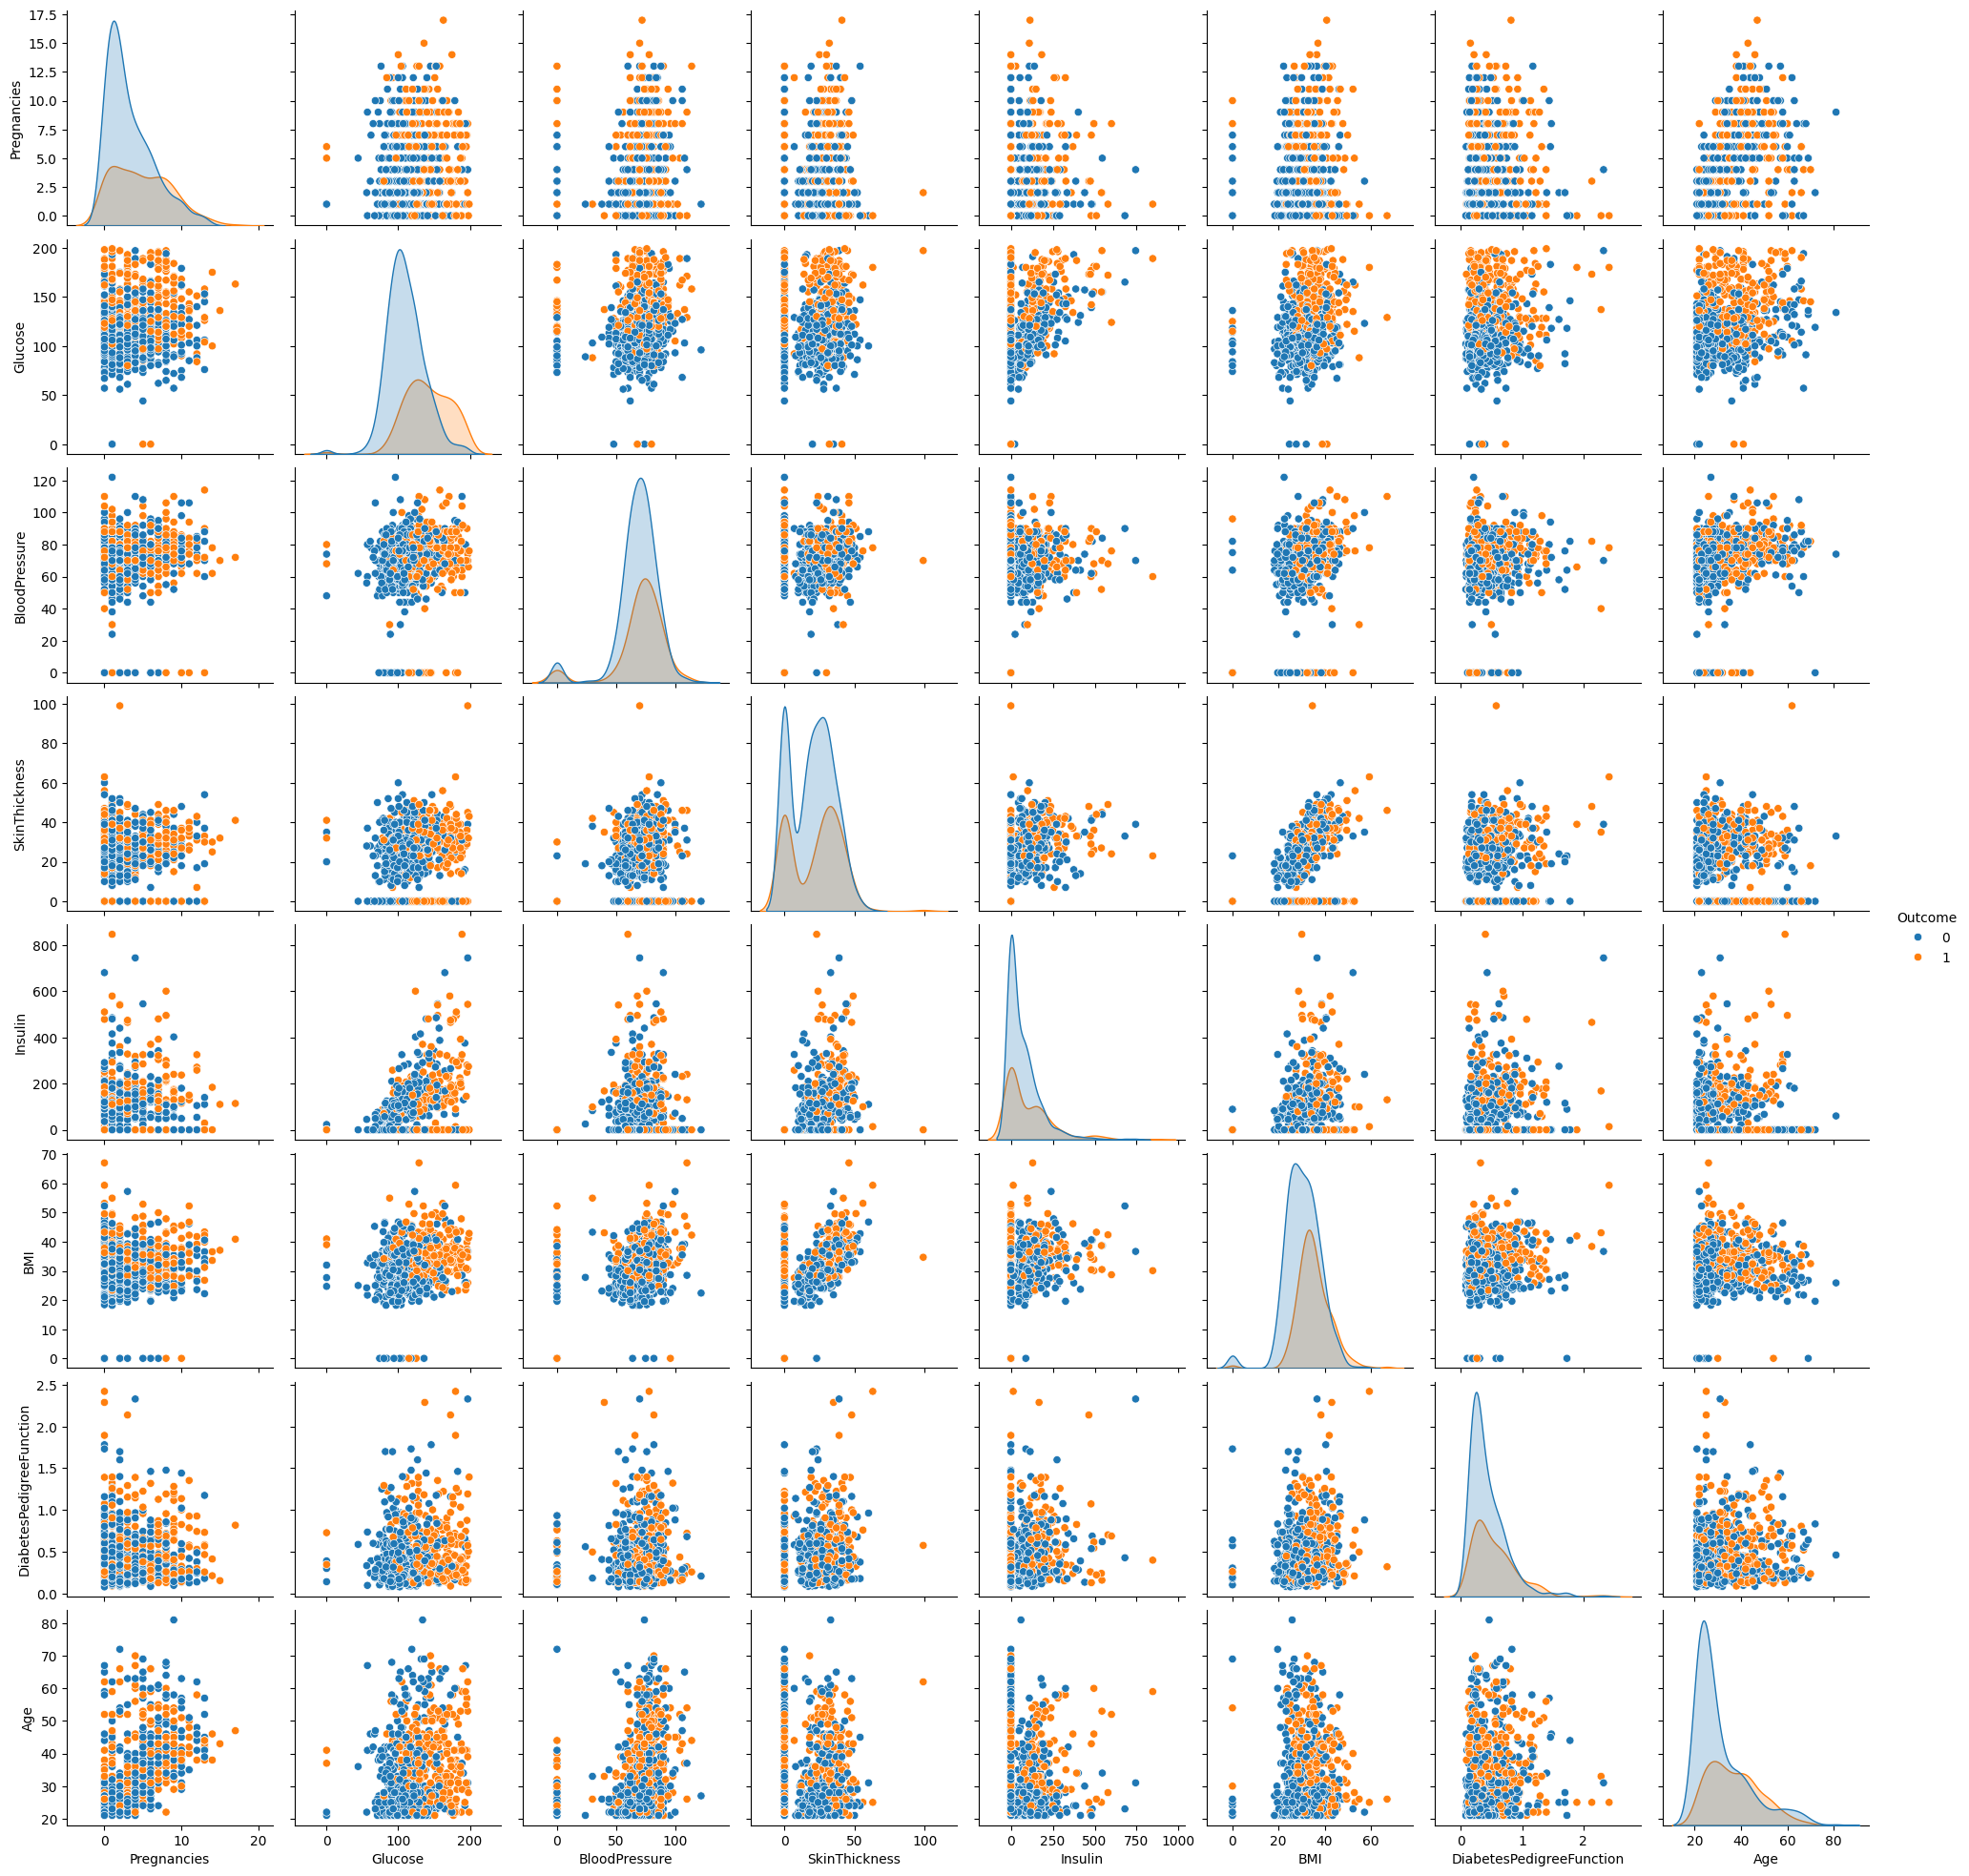

In [ ]:
# pair plot
sns.pairplot(diabetes_df, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

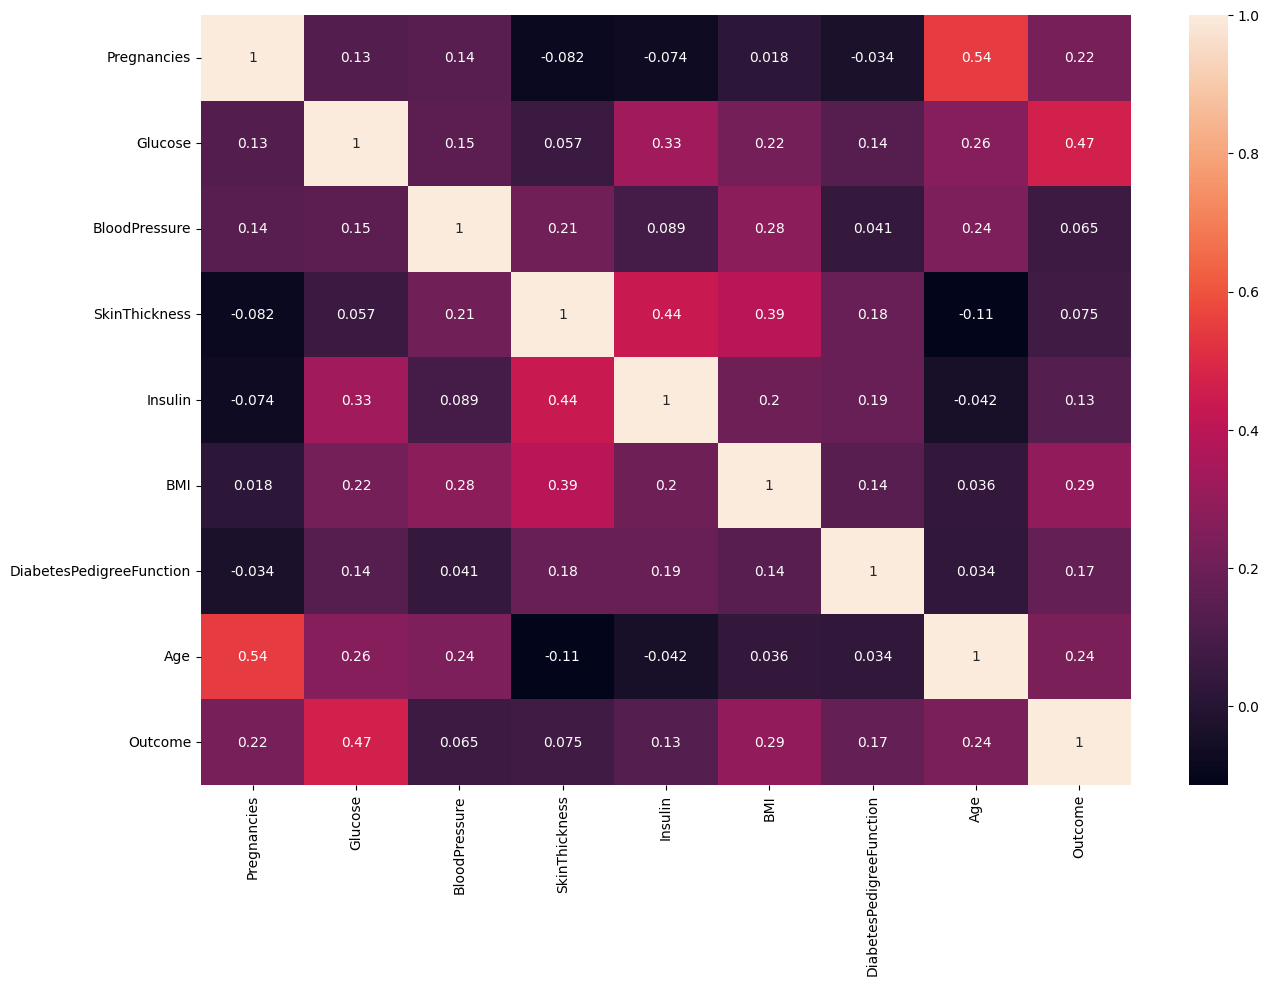

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(diabetes_df.corr(), annot = True);

<Axes: xlabel='Outcome', ylabel='count'>

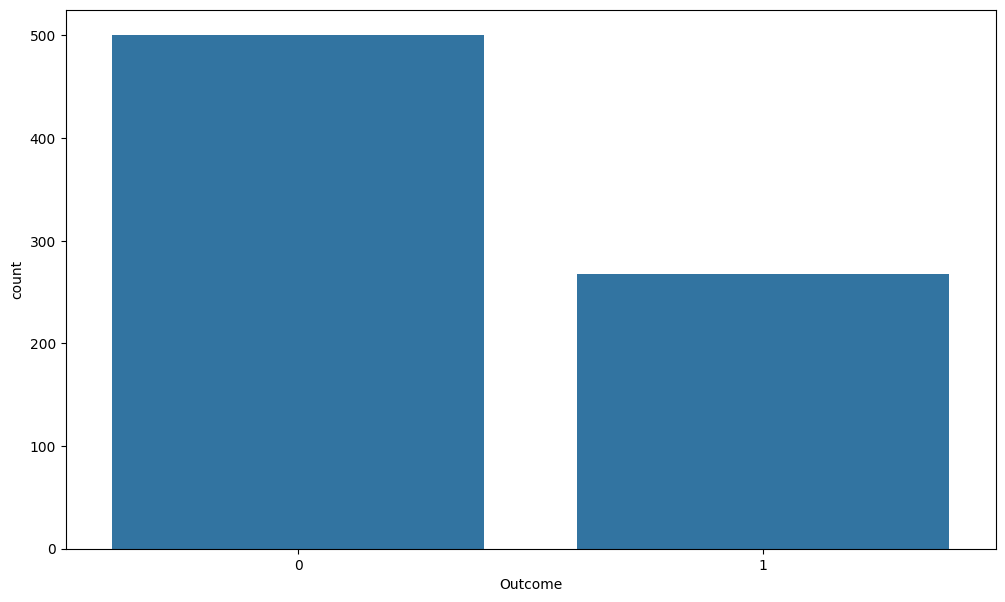

In [ ]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Outcome', data = diabetes_df)

## membagi data train & test

In [ ]:
# Pisahkan data menjadi 80% untuk pelatihan dan 20% untuk pengujian menggunakan train_test_split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(diabetes_df, test_size=0.2, random_state=0)
# tanpa memisahkan x dan y, jadi langsung aja pakai nama datasetnya

In [ ]:
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
468,8,120,0,0,0,30.0,0.183,38,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
192,7,159,66,0,0,30.4,0.383,36,1
629,4,94,65,22,0,24.7,0.148,21,0
559,11,85,74,0,0,30.1,0.300,35,0


In [ ]:
df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29,1
482,4,85,58,22,49,27.8,0.306,28,0
230,4,142,86,0,0,44.0,0.645,22,1
527,3,116,74,15,105,26.3,0.107,24,0


## Gunakan preset ‘best_quality’ dan metrik ‘accuracy’, latih model klasifikasi menggunakan AutoGluon untuk memprediksi kolom "Outcome".

In [ ]:
predictor = TabularPredictor(label="Outcome", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = df_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250201_051939"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.92 GB / 12.67 GB (78.3%)
Disk Space Avail:   74.90 GB / 107.72 GB (69.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMXT_BAG_L1   0.786645    accuracy       0.043766  28.407513                0.043766          28.407513            1       True          3
1      WeightedEnsemble_L2   0.786645    accuracy       0.045084  28.544041                0.001319           0.136528            2       True         10
2          LightGBM_BAG_L1   0.785016    accuracy       0.086936  43.321755                0.086936          43.321755            1       True          4
3          CatBoost_BAG_L1   0.783388    accuracy       0.009437  26.224319                0.009437          26.224319            1       True          7
4  RandomForestEntr_BAG_L1   0.757329    accuracy       0.381167   1.849597                0.381167           1.849597            1       True          6
5  RandomFores

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7003257328990228,
  'KNeighborsDist_BAG_L1': 0.6970684039087948,
  'LightGBMXT_BAG_L1': 0.7866449511400652,
  'LightGBM_BAG_L1': 0.7850162866449512,
  'RandomForestGini_BAG_L1': 0.745928338762215,
  'RandomForestEntr_BAG_L1': 0.757328990228013,
  'CatBoost_BAG_L1': 0.7833876221498371,
  'ExtraTreesGini_BAG_L1': 0.741042345276873,
  'ExtraTreesEntr_BAG_L1': 0.739413680781759,
  'WeightedEnsemble_L2

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,0.786645,accuracy,0.043766,28.407513,0.043766,28.407513,1,True,3
1,WeightedEnsemble_L2,0.786645,accuracy,0.045084,28.544041,0.001319,0.136528,2,True,10
2,LightGBM_BAG_L1,0.785016,accuracy,0.086936,43.321755,0.086936,43.321755,1,True,4
3,CatBoost_BAG_L1,0.783388,accuracy,0.009437,26.224319,0.009437,26.224319,1,True,7
4,RandomForestEntr_BAG_L1,0.757329,accuracy,0.381167,1.849597,0.381167,1.849597,1,True,6
5,RandomForestGini_BAG_L1,0.745928,accuracy,0.271655,1.691624,0.271655,1.691624,1,True,5
6,ExtraTreesGini_BAG_L1,0.741042,accuracy,0.369948,1.203403,0.369948,1.203403,1,True,8
7,ExtraTreesEntr_BAG_L1,0.739414,accuracy,0.239314,1.400718,0.239314,1.400718,1,True,9
8,KNeighborsUnif_BAG_L1,0.700326,accuracy,0.024854,0.008990,0.024854,0.008990,1,True,1
9,KNeighborsDist_BAG_L1,0.697068,accuracy,0.019025,0.005777,0.019025,0.005777,1,True,2


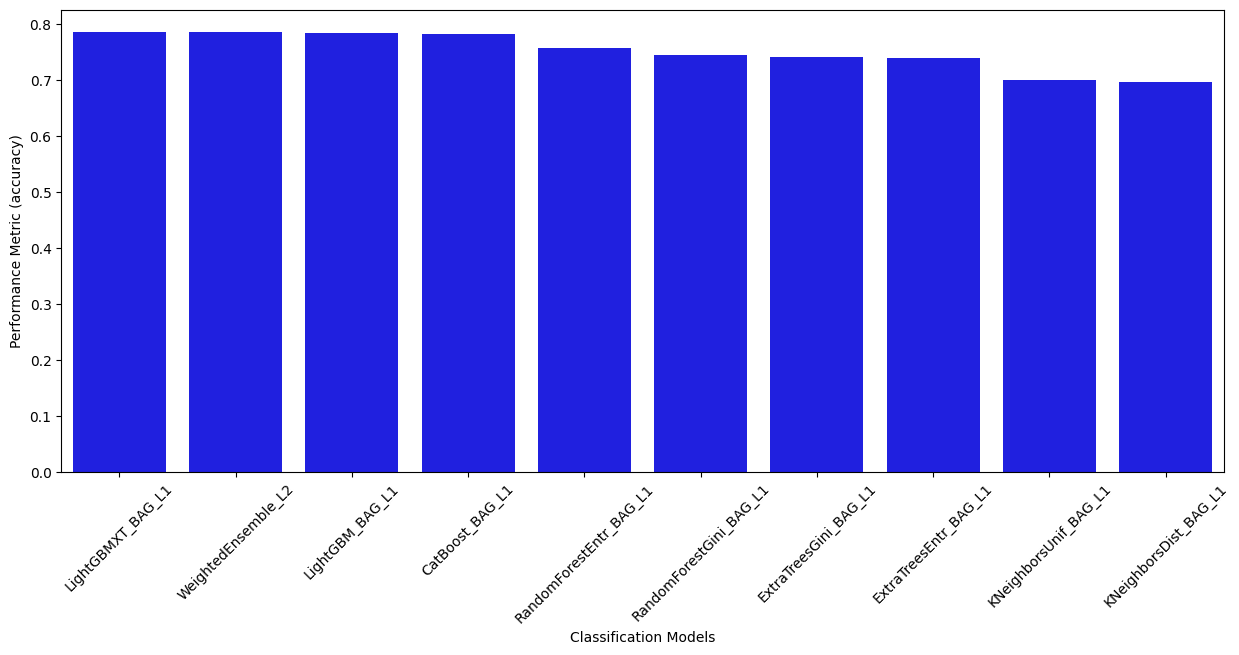

In [ ]:
# Inisialisasi figur matplotlib
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);

In [ ]:
predictor.evaluate(df_test)

{'accuracy': 0.8051948051948052,
 'balanced_accuracy': 0.7285742692384172,
 'mcc': 0.5130367767271086,
 'roc_auc': 0.8683634917478624,
 'f1': 0.625,
 'precision': 0.7575757575757576,
 'recall': 0.5319148936170213}

In [ ]:
# evaluasi hasil prediksi df test
y_pred = predictor.predict(df_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [1, 0, 0, 1, 0]


In [ ]:
y_test = df_test['Outcome']
y_test

,Outcome
661,1
122,0
113,0
14,1
529,0
...,...
476,1
482,0
230,1
527,0


<Axes: >

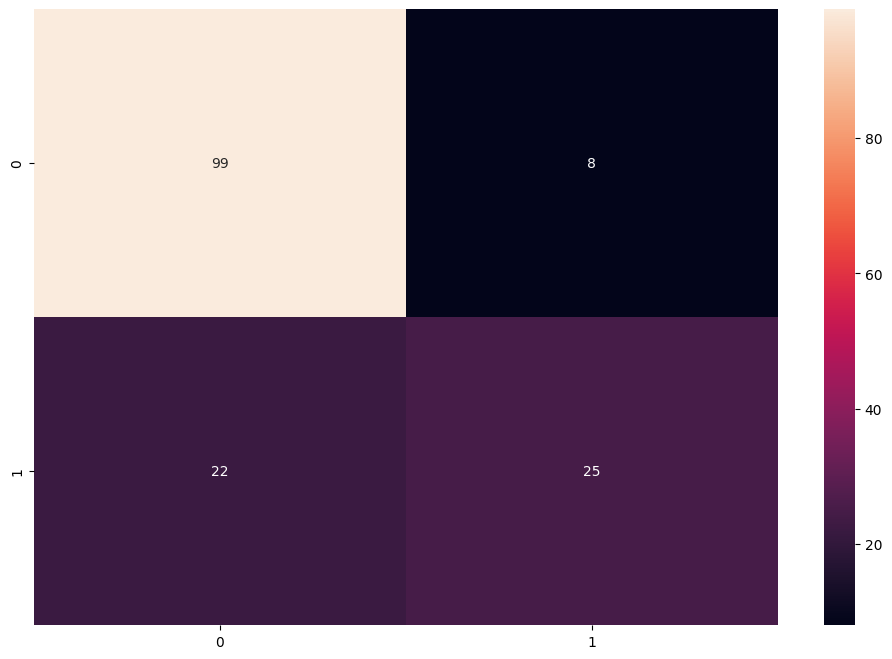

In [ ]:
# performa pada data latih
from sklearn.metrics import confusion_matrix
# performa pada data uji
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.76      0.53      0.62        47

    accuracy                           0.81       154
   macro avg       0.79      0.73      0.75       154
weighted avg       0.80      0.81      0.79       154



melihat support "1", & "0" ada gap jauh = imbalance maka akan terjadi **missleding**
oleh sebab itu melihat f1-scrore saja = 0.62